In [1]:
%matplotlib inline


# Animated histogram


Use a path patch to draw a bunch of rectangles for an animated histogram.


In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

Here comes the tricky part -- we have to set up the vertex and path codes
arrays using ``plt.Path.MOVETO``, ``plt.Path.LINETO`` and
``plt.Path.CLOSEPOLY`` for each rect.

* We need 1 ``MOVETO`` per rectangle, which sets the initial point.
* We need 3 ``LINETO``'s, which tell Matplotlib to draw lines from
  vertex 1 to vertex 2, v2 to v3, and v3 to v4.
* We then need one ``CLOSEPOLY`` which tells Matplotlib to draw a line from
  the v4 to our initial vertex (the ``MOVETO`` vertex), in order to close the
  polygon.

<div class="alert alert-info"><h4>Note</h4><p>The vertex for ``CLOSEPOLY`` is ignored, but we still need a placeholder
  in the ``verts`` array to keep the codes aligned with the vertices.</p></div>



In [3]:
nverts = nrects * (1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

To animate the histogram, we need an ``animate`` function, which generates
a random set of numbers and updates the locations of the vertices for the
histogram (in this case, only the heights of each rectangle). ``patch`` will
eventually be a ``Patch`` object.



In [4]:
patch = None


def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

And now we build the `Path` and `Patch` instances for the histogram using
our vertices and codes. We add the patch to the `Axes` instance, and setup
the `FuncAnimation` with our animate function.



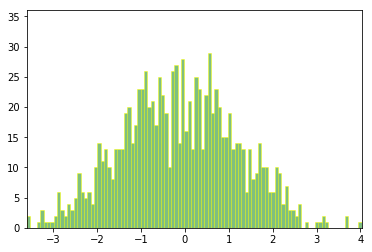

In [5]:
fig, ax = plt.subplots()
barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

ani = animation.FuncAnimation(fig, animate, 100, repeat=False, blit=True)
plt.show()